# Case Study-2 

##### Ques-1 - 
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding.
Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". 
For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
data_set = pd.read_csv('./startup_funding.csv')
df = data_set.copy() #We make a copy of the given data set in order to retrive the original dataset whenever we want

In [5]:
df.CityLocation.fillna("",inplace=True) #Fill the value of city having NAN with empty string

In [6]:
def extractCity(loc):
    if '/' in loc:
        cityList = loc.split('/') # Incase the starup has more than one city we get the indian city by taking
                                  # first index as the city name after spliting the array .
        return cityList[0].strip().capitalize()
    else:
        return loc.strip().capitalize() 
#Capitalization is done in order to convert city like banglore to Banglore
df['ind_city'] = df['CityLocation'].apply(extractCity)

In [8]:
#This done in order to convert different names of New Delhi .
def convert(a):
    if a =='Delhi' or a=='New delhi':
        return 'New Delhi'
    else:
        return a
df['ind_city']=df['ind_city'].apply(convert)

In [21]:
# We find number of fundings made in different cities of india
index = df['ind_city'].value_counts().index
values= df['ind_city'].value_counts().values

In [22]:
# We Convert these arrays into numpy arrays
np_index = np.array(index)
np_values= np.array(values)

In [34]:
# Now we find the total of fundings given in ncr region
sum_ncr = np_values[(np_index=='Gurgaon') | (np_index=='Noida') | (np_index=='New Delhi') ].sum()

In [41]:
labels = ['Bangalore','Mumbai','NCR']
value = []
value.append(np_values[(np_index == 'Bangalore')][0])
value.append(np_values[(np_index == 'Mumbai')][0])
value.append(sum_ncr)

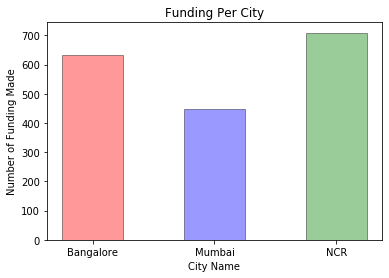

In [55]:
# Finally we plot the graph 
color = ['red','blue','green']
plt.bar(height = value,x = labels,color=color,edgecolor='black',width=0.5,alpha=0.4)
plt.xlabel('City Name')
plt.ylabel('Number of Funding Made')
plt.title('Funding Per City')
plt.show()

In [63]:
#Clearly NCR is the most favourable area to start a start up
print(labels[value.index(max(value))])

NCR


###  Sol- The city with most funding is NCR 

### Ques 2-
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. 
Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. 
Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. 
Ignore undisclosed investors.

In [185]:
# To Proceed with this we extract the name of the investors from tha data

name = {}
# We maintain a dictionary to count number of fundings by each investor 
def extractName(a):
    if isinstance(a,str):
        temp = a.split(',')
        for i in temp:
            name_c=i.strip()
            if (name_c in name):
                name[name_c]=name[name_c]+1
            else:
                name[name_c]=1
df['InvestorsName'].apply(extractName)


name_arr=[]
num_arr=[]

for i in name:
    name_arr.append(i)
    num_arr.append(name[i])

np_name = np.array(name_arr)
np_num  = np.array(num_arr)

In [186]:
np_num = np_num[(np_name != 'Undisclosed investors') & (np_name != 'Undisclosed Investors') ]

In [187]:
name_list = np_name[(np_name != 'Undisclosed investors') & (np_name != 'Undisclosed Investors')]

In [188]:
name_list = name_list[np_num.argsort()][-1:-6:-1]
num_list  = np_num[np_num.argsort()][-1:-6:-1]

In [189]:
for i in range(0,len(name_list)):
    print(name_list[i],num_list[i])

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


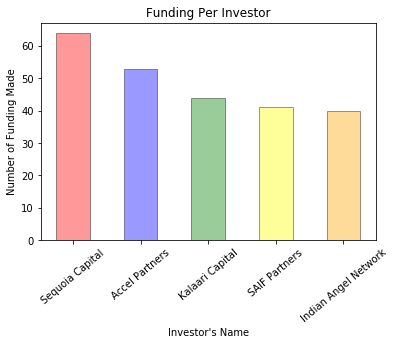

In [190]:
color = ['red','blue','green','yellow','orange']
plt.bar(height = num_list,x = name_list,color=color,edgecolor='black',width=0.5,alpha=0.4)
plt.xticks(rotation = 40)
plt.xlabel("Investor's Name")
plt.ylabel('Number of Funding Made')
plt.title('Funding Per Investor')
plt.show()

### List of investors:-
 Sequoia Capital, 
 Accel Partners, 
 Kalaari Capital ,
 SAIF Partners, 
 Indian Angel Network .

## Ques 3-
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. 
This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. 
That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [151]:
# We first correct the names of the companies in order to proceed with the analysis
def check(a):
    if 'Paytm' in a:
        return 'Paytm'
    if ('Oyo' in a ) or ('OYO Rooms' in a):
        return 'Oyo'
    if 'Flipkart' in a:
        return 'Flipkart'
    if 'Ola' in a:
        return 'Ola'
    return a
df['cmp_name'] = df['StartupName'].apply(check) # We Create a new column in the dataframe to store the corrected name 
                                                # the name of the column is cmp_name  

In [164]:
# In order to get the name of the investors who invested in different startups we maintain a diction with key value
# being the name of the investor and the value being a set of companies in which each investor invested this helps 
# us in getting the number of the unique companies that a particular investor has investor 

invest_dict = {}

def extractName(a):
    investors_list = a.values
    company_name   = a.name
    for investor_str in investors_list:
        if isinstance(investor_str,str):
            split_list = investor_str.split(',')
            for investor in split_list:
                    if investor == '':
                        continue
                    investor = investor.strip()
                    if(investor in invest_dict):
                        invest_dict[investor].add(company_name)
                    else:
                        invest_dict[investor] = set([company_name])
                        
temp = df.groupby('cmp_name')['InvestorsName'].apply(extractName)

In [165]:
name = []
num  = []
for i in invest_dict:
    name.append(i)
    num.append(len(invest_dict[i]))

In [166]:
np_name = np.array(name)
np_num  = np.array(num)

In [175]:
name_list = np_name[(np_name != 'Undisclosed investors') & (np_name != 'Undisclosed Investors')]
np_num = np_num[(np_name != 'Undisclosed investors') & (np_name != 'Undisclosed Investors')]

In [179]:
final_name = name_list [np_num.argsort()][-1:-6:-1]
final_num  = np_num[np_num.argsort()][-1:-6:-1]

In [180]:
for i in range(0,len(final_name)):
    print(final_name[i],final_num[i])

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


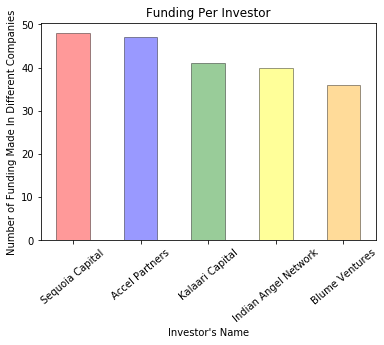

In [181]:
color = ['red','blue','green','yellow','orange']
plt.bar(height = final_num,x = final_name,color=color,edgecolor='black',width=0.5,alpha=0.4)
plt.xticks(rotation = 40)
plt.xlabel("Investor's Name")
plt.ylabel('Number of Funding Made In Different Companies')
plt.title('Funding Per Investor')
plt.show()

## List of Investors
Sequoia Capital, Accel Partners, Kalaari Capital , SAIF Partners, Blume Ventures .

## Ques- 4
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. 
This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding".
Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [3]:
## First we correct the speeling of the Start Up as done earlier
def check(a):
    if 'Paytm' in a:
        return 'Paytm'
    if ('Oyo' in a ) or ('OYO Rooms' in a):
        return 'Oyo'
    if 'Flipkart' in a:
        return 'Flipkart'
    if 'Ola' in a:
        return 'Ola'
    return a
df['cmp_name'] = df['StartupName'].apply(check) # We Create a new column in the dataframe to store the corrected name 
                                                # the name of the column is cmp_name  

In [5]:
## NO we correct the name of the funding type
def correction(a):
    if a == 'SeedFunding':
        return 'Seed Funding'
    if a == 'Crowd funding':
        return 'Crowd Funding'
    if a == 'PrivateEquity':
        return 'Private Equity'
    return a
df['fund_type'] = df['InvestmentType'].apply(correction)

In [7]:
# According to question we must take funding of type seed funding and crowd funding into account so we create a new
# dataframe out of the existing df dataframe that meets our conditions

fund_df = df[(df['fund_type']=='Seed Funding') | (df['fund_type'] == 'Crowd Funding')]

In [11]:
# In order to get the name of the investors who invested in different startups we maintain a diction with key value
# being the name of the investor and the value being a set of companies in which each investor invested this helps 
# us in getting the number of the unique companies that a particular investor has investor 

invest_dict = {}

def extractName(a):
    investors_list = a.values
    company_name   = a.name
    for investor_str in investors_list:
        if isinstance(investor_str,str):
            split_list = investor_str.split(',')
            for investor in split_list:
                    if investor == '':
                        continue
                    investor = investor.strip()
                    if(investor in invest_dict):
                        invest_dict[investor].add(company_name)
                    else:
                        invest_dict[investor] = set([company_name])
                        
temp = fund_df.groupby('cmp_name')['InvestorsName'].apply(extractName)

In [14]:
name = []
num  = []
for i in invest_dict:
    name.append(i)
    num.append(len(invest_dict[i]))

In [15]:
np_name = np.array(name)
np_num  = np.array(num)

In [16]:
name_list = np_name[(np_name != 'Undisclosed investors') & (np_name != 'Undisclosed Investors')]
np_num = np_num[(np_name != 'Undisclosed investors') & (np_name != 'Undisclosed Investors')]

In [17]:
final_name = name_list [np_num.argsort()][-1:-6:-1]
final_num  = np_num[np_num.argsort()][-1:-6:-1]

In [18]:
for i in range(0,len(final_name)):
    print(final_name[i],final_num[i])

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


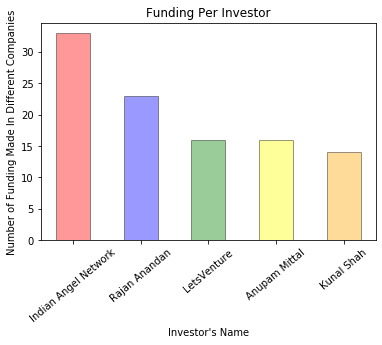

In [20]:
color = ['red','blue','green','yellow','orange']
plt.bar(height = final_num,x = final_name,color=color,edgecolor='black',width=0.5,alpha=0.4)
plt.xticks(rotation = 40)
plt.xlabel("Investor's Name")
plt.ylabel('Number of Funding Made In Different Companies')
plt.title('Funding Per Investor')
plt.show()

## List of Investors
Indian Angel Network ,
Rajan Anandan ,
LetsVenture ,
Anupam Mittal ,
Kunal Shah.

## Ques - 5 
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. 
Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". 
Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [42]:
## First we correct the speeling of the Start Up as done earlier
def check(a):
    if 'Paytm' in a:
        return 'Paytm'
    if ('Oyo' in a ) or ('OYO Rooms' in a):
        return 'Oyo'
    if 'Flipkart' in a:
        return 'Flipkart'
    if 'Ola' in a:
        return 'Ola'
    return a
df['cmp_name'] = df['StartupName'].apply(check) # We Create a new column in the dataframe to store the corrected name 
                                                # the name of the column is cmp_name  

In [43]:
## NO we correct the name of the funding type
def correction(a):
    if a == 'SeedFunding':
        return 'Seed Funding'
    if a == 'Crowd funding':
        return 'Crowd Funding'
    if a == 'PrivateEquity':
        return 'Private Equity'
    return a
df['fund_type'] = df['InvestmentType'].apply(correction)

In [44]:
# According to question we must take funding of type seed funding and crowd funding into account so we create a new
# dataframe out of the existing df dataframe that meets our conditions

fund_df = df[(df['fund_type']=='Private Equity')]

In [45]:
# In order to get the name of the investors who invested in different startups we maintain a diction with key value
# being the name of the investor and the value being a set of companies in which each investor invested this helps 
# us in getting the number of the unique companies that a particular investor has investor 

invest_dict = {}

def extractName(a):
    investors_list = a.values
    company_name   = a.name
    for investor_str in investors_list:
        if isinstance(investor_str,str):
            split_list = investor_str.split(',')
            for investor in split_list:
                    if investor == '':
                        continue
                    investor = investor.strip()
                    if(investor in invest_dict):
                        invest_dict[investor].add(company_name)
                    else:
                        invest_dict[investor] = set([company_name])
                        
temp = fund_df.groupby('cmp_name')['InvestorsName'].apply(extractName)

In [46]:
name = []
num  = []
for i in invest_dict:
    name.append(i)
    num.append(len(invest_dict[i]))

In [47]:
np_name = np.array(name)
np_num  = np.array(num)

In [48]:
name_list = np_name[(np_name != 'Undisclosed investors') & (np_name != 'Undisclosed Investors')]
np_num = np_num[(np_name != 'Undisclosed investors') & (np_name != 'Undisclosed Investors')]

In [49]:
final_name = name_list [np_num.argsort()][-1:-6:-1]
final_num  = np_num[np_num.argsort()][-1:-6:-1]

In [50]:
for i in range(0,len(final_name)):
    print(final_name[i],final_num[i])

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


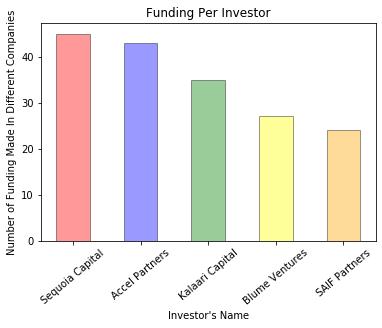

In [51]:
color = ['red','blue','green','yellow','orange']
plt.bar(height = final_num,x = final_name,color=color,edgecolor='black',width=0.5,alpha=0.4)
plt.xticks(rotation = 40)
plt.xlabel("Investor's Name")
plt.ylabel('Number of Funding Made In Different Companies')
plt.title('Funding Per Investor')
plt.show()

## List of Investors
Sequoia Capital ,
Accel Partners ,
Kalaari Capital ,
Blume Ventures ,
SAIF Partners.